In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
model = LogisticRegression()
%matplotlib inline

In [2]:
data = pd.read_csv('loan_approval_dataset.csv') # Training set is already available
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
t = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
data[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [5]:
d = data.describe()
d

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

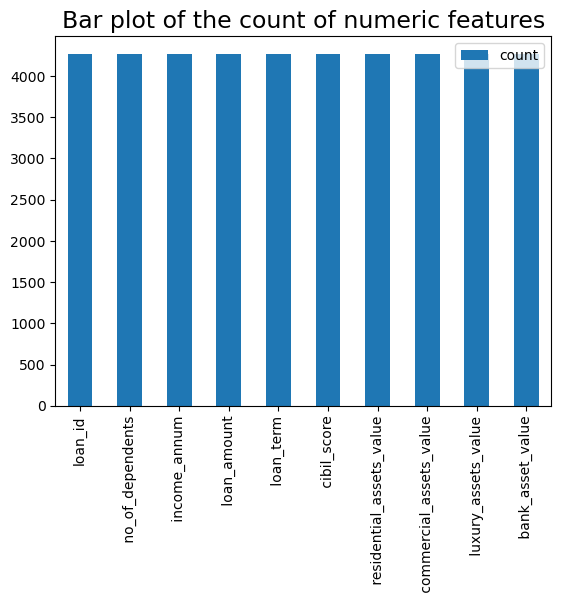

In [6]:
dT = d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [7]:
education = pd.get_dummies(data[' education'],drop_first=True,prefix='education')
self_employed = pd.get_dummies(data[' self_employed'],drop_first=True, prefix= 'self_employed')
loan_status = pd.get_dummies(data[' loan_status'],drop_first=True, prefix= 'loan_status')

In [8]:
data.drop([' education',' self_employed',' loan_status'],axis=1,inplace=True)

data = pd.concat([data,education,self_employed,loan_status],axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    income_annum              4269 non-null   int64
 3    loan_amount               4269 non-null   int64
 4    loan_term                 4269 non-null   int64
 5    cibil_score               4269 non-null   int64
 6    residential_assets_value  4269 non-null   int64
 7    commercial_assets_value   4269 non-null   int64
 8    luxury_assets_value       4269 non-null   int64
 9    bank_asset_value          4269 non-null   int64
 10  education_ Not Graduate    4269 non-null   uint8
 11  self_employed_ Yes         4269 non-null   uint8
 12  loan_status_ Rejected      4269 non-null   uint8
dtypes: int64(10), uint8(3)
memory usage: 346.2 KB


In [9]:
data.drop(['loan_id'],axis=1,inplace=True)

In [10]:
scaler.fit(data.drop('loan_status_ Rejected',axis=1))
scaled_features = scaler.transform(data.drop('loan_status_ Rejected',axis=1))
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [11]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('loan_status_ Rejected',axis=1),data['loan_status_ Rejected'],test_size = 0.25, random_state = 0)

In [13]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
best_clf.score(X_test,y_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


c:\Users\Acer\anaconda3\envs\Python_Project\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\anaconda3\envs\Python_Project\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\anaconda3\envs\Python_Project\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Us

0.9194756554307116

In [14]:
with open('classifier.pkl','wb') as file1:
    pickle.dump(clf,file1)